In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('../data.csv')

In [3]:
df.head()

,_id,user_id,polarity,subjectivity,verified,protected,favorites,retweets,no_tweets,no_tweets_total,followers
0,61a9960439f20bc593df96aa,3291163969,0.000000,0.000000,0,0,0,0,1,6827,84
1,61a9960439f20bc593df96ab,972324438065778688,0.000000,0.000000,0,0,0,0,1,36809,651
2,61a9960439f20bc593df96ac,1103056950,0.000000,0.000000,0,0,0,0,1,37754,1129
3,61a9960439f20bc593df96ad,2843874390,-0.116667,0.166667,0,0,0,0,3,125283,3176
4,61a9960439f20bc593df96ae,1435579353337712650,0.000000,0.000000,0,0,0,0,32,17585,305


In [4]:
# Normalizing polarity values
df['polarity'] = df['polarity'].apply(lambda x: (x+1)/2)

In [5]:
# Missing values
pd.isna(df).sum()

_id                0
user_id            0
polarity           0
subjectivity       0
verified           0
protected          0
favorites          0
retweets           0
no_tweets          0
no_tweets_total    0
followers          0
dtype: int64

In [6]:
# Removing user id columns
profiles_df = df.drop(columns=['_id', 'user_id'])

In [7]:
profiles_df.head()

,polarity,subjectivity,verified,protected,favorites,retweets,no_tweets,no_tweets_total,followers
0,0.500000,0.000000,0,0,0,0,1,6827,84
1,0.500000,0.000000,0,0,0,0,1,36809,651
2,0.500000,0.000000,0,0,0,0,1,37754,1129
3,0.441667,0.166667,0,0,0,0,3,125283,3176
4,0.500000,0.000000,0,0,0,0,32,17585,305


In [8]:
# Preprocessing pipeline

numerical_attr = ['no_tweets_total', 'followers']

all_transformations = [('numerical', StandardScaler(), numerical_attr)]

pipeline = ColumnTransformer(all_transformations, remainder='passthrough')

In [9]:
# Transforming dataset
df_transformed = pipeline.fit_transform(profiles_df)

In [10]:
import pickle

# Save pipeline for future use
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [11]:
pd.DataFrame(df_transformed)

,0,1,2,3,4,5,6,7,8
0,-0.186332,-0.023502,0.500000,0.000000,0.0,0.0,0.0,0.0,1.0
1,0.241152,-0.019961,0.500000,0.000000,0.0,0.0,0.0,0.0,1.0
2,0.254626,-0.016976,0.500000,0.000000,0.0,0.0,0.0,0.0,1.0
3,1.502617,-0.004194,0.441667,0.166667,0.0,0.0,0.0,0.0,3.0
4,-0.032944,-0.022122,0.500000,0.000000,0.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...
14176,0.171032,-0.020810,0.500000,0.000000,0.0,0.0,1.0,0.0,1.0
14177,0.780448,-0.010982,0.512500,0.456250,0.0,0.0,0.0,0.0,1.0
14178,-0.283657,-0.024026,0.500000,0.000000,0.0,0.0,0.0,0.0,1.0
14179,-0.055129,-0.023027,0.500000,0.000000,0.0,0.0,0.0,0.0,1.0


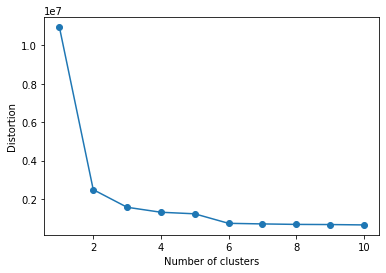

In [12]:
# Use Elbow method to find the optimum number of clusters

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_transformed)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [13]:
# KMeans clustering model
cluster_model = KMeans(
            n_clusters=3, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0)

clusters = cluster_model.fit_predict(df_transformed)

In [15]:
# Save model for future inference
with open('cluster_model.pkl', 'wb') as f:
    pickle.dump(cluster_model, f)

In [12]:
df['cluster'] = clusters

In [13]:
df['cluster'].value_counts()

2    14157
1       17
0        7
Name: cluster, dtype: int64

In [16]:
df.head()

,_id,user_id,polarity,subjectivity,verified,protected,favorites,retweets,no_tweets,no_tweets_total,followers,cluster
0,61a9960439f20bc593df96aa,3291163969,0.500000,0.000000,0,0,0,0,1,6827,84,2
1,61a9960439f20bc593df96ab,972324438065778688,0.500000,0.000000,0,0,0,0,1,36809,651,2
2,61a9960439f20bc593df96ac,1103056950,0.500000,0.000000,0,0,0,0,1,37754,1129,2
3,61a9960439f20bc593df96ad,2843874390,0.441667,0.166667,0,0,0,0,3,125283,3176,2
4,61a9960439f20bc593df96ae,1435579353337712650,0.500000,0.000000,0,0,0,0,32,17585,305,2


In [38]:
# Create cluster profiles by calculating stats

cluster_list = []
for i in range(3):
    df_test = df.loc[df['cluster']==i]
    cluster = i
    customers = df_test.shape[0]
    avg_polarity = round(df_test['polarity'].mean(), 4)
    avg_subjectivity = round(df_test['subjectivity'].mean(), 4)
    no_verified = int(df_test['verified'].sum())
    no_protected = int(df_test['protected'].sum())
    avg_favorites = round(df_test['favorites'].mean(), 4)
    avg_tweets = round(df_test['no_tweets'].mean(), 4)
    avg_account_tweets = round(df_test['no_tweets_total'].mean(), 4)
    avg_followers = int(df_test['followers'].mean())
    
    cluster_item = {
        "cluster": cluster,
        "customers": customers,
        "avg_polarity": avg_polarity,
        "avg_subjectivity": avg_subjectivity,
        "no_verified": no_verified,
        "no_protected": no_protected,
        "avg_favorites": avg_favorites,
        "avg_tweets": avg_tweets,
        "avg_account_tweets": avg_account_tweets,
        "avg_followers": avg_followers
    }
    
    cluster_list.append(cluster_item)

In [27]:
df_test

,_id,user_id,polarity,subjectivity,verified,protected,favorites,retweets,no_tweets,no_tweets_total,followers,cluster
606,61a9961039f20bc593df9908,1425973659152355329,0.595238,0.346726,0,0,1380,494,14,6272,12567,0
1632,61a9962939f20bc593df9d0a,250887629,0.250000,0.750000,1,0,777,41,1,63306,487849,0
3422,61a9965d39f20bc593dfa408,1317483561163792384,0.776667,0.561111,0,0,907,491,3,6475,62098,0
6097,61a996b739f20bc593dfae7b,30584107,0.732143,0.257143,1,0,935,107,2,169976,96638,0
6938,61a996d439f20bc593dfb1c4,1381100437424705539,0.875000,0.450000,0,0,639,209,1,29781,16832,0
11585,61a9979839f20bc593dfc3eb,1216366866504904705,0.500000,0.025000,0,0,1553,588,2,9808,224645,0
13569,61a9980739f20bc593dfcbab,1138458175663988738,0.500000,0.000000,0,0,1242,117,1,16423,190726,0


In [39]:
cluster_list

[{'cluster': 0,
  'customers': 7,
  'avg_polarity': 0.6041,
  'avg_subjectivity': 0.3414,
  'no_verified': 2,
  'no_protected': 0,
  'avg_favorites': 1061.8571,
  'avg_tweets': 3.4286,
  'avg_account_tweets': 43148.7143,
  'avg_followers': 155907},
 {'cluster': 1,
  'customers': 17,
  'avg_polarity': 0.5167,
  'avg_subjectivity': 0.3336,
  'no_verified': 1,
  'no_protected': 0,
  'avg_favorites': 226.1765,
  'avg_tweets': 3.8235,
  'avg_account_tweets': 10165.4706,
  'avg_followers': 24303},
 {'cluster': 2,
  'customers': 14157,
  'avg_polarity': 0.546,
  'avg_subjectivity': 0.2649,
  'no_verified': 106,
  'no_protected': 0,
  'avg_favorites': 1.0506,
  'avg_tweets': 1.2369,
  'avg_account_tweets': 19895.7279,
  'avg_followers': 3747}]

In [31]:
import requests
import json

In [40]:
# Post cluster details to the database using API

url = 'http://127.0.0.1:8000/api/clusters/'
for i in cluster_list:
    x = requests.post(url, json=i)
    
    print(x.text)

{"cluster": 0, "customers": 7, "avg_polarity": "0.6041", "avg_subjectivity": "0.3414", "no_verified": 2, "no_protected": 0, "avg_favorites": "1061.8571", "avg_tweets": "3.4286", "avg_account_tweets": "43148.7143", "avg_followers": 155907}
{"cluster": 1, "customers": 17, "avg_polarity": "0.5167", "avg_subjectivity": "0.3336", "no_verified": 1, "no_protected": 0, "avg_favorites": "226.1765", "avg_tweets": "3.8235", "avg_account_tweets": "10165.4706", "avg_followers": 24303}
{"cluster": 2, "customers": 14157, "avg_polarity": "0.5460", "avg_subjectivity": "0.2649", "no_verified": 106, "no_protected": 0, "avg_favorites": "1.0506", "avg_tweets": "1.2369", "avg_account_tweets": "19895.7279", "avg_followers": 3747}


In [41]:
y = requests.get(url)
print(y.text)

[{"cluster": 0, "customers": 7, "avg_polarity": "0.6041", "avg_subjectivity": "0.3414", "no_verified": 2, "no_protected": 0, "avg_favorites": "1061.8571", "avg_tweets": "3.4286", "avg_account_tweets": "43148.7143", "avg_followers": 155907}, {"cluster": 1, "customers": 17, "avg_polarity": "0.5167", "avg_subjectivity": "0.3336", "no_verified": 1, "no_protected": 0, "avg_favorites": "226.1765", "avg_tweets": "3.8235", "avg_account_tweets": "10165.4706", "avg_followers": 24303}, {"cluster": 2, "customers": 14157, "avg_polarity": "0.5460", "avg_subjectivity": "0.2649", "no_verified": 106, "no_protected": 0, "avg_favorites": "1.0506", "avg_tweets": "1.2369", "avg_account_tweets": "19895.7279", "avg_followers": 3747}]


In [48]:
df.head()

,_id,user_id,polarity,subjectivity,verified,protected,favorites,retweets,no_tweets,no_tweets_total,followers,cluster
0,61a9960439f20bc593df96aa,3291163969,0.500000,0.000000,0,0,0,0,1,6827,84,2
1,61a9960439f20bc593df96ab,972324438065778688,0.500000,0.000000,0,0,0,0,1,36809,651,2
2,61a9960439f20bc593df96ac,1103056950,0.500000,0.000000,0,0,0,0,1,37754,1129,2
3,61a9960439f20bc593df96ad,2843874390,0.441667,0.166667,0,0,0,0,3,125283,3176,2
4,61a9960439f20bc593df96ae,1435579353337712650,0.500000,0.000000,0,0,0,0,32,17585,305,2


In [59]:
# Update customer details in the database using the API

count = 0
url = 'http://127.0.0.1:8000/api/addcust/'
for k, row in df.iterrows():
    row.pop('_id')
    row = row.to_dict()
    x = requests.post(url, json=row)